# 청경채 잎 면적 증감률 예측

In [1]:
# 모듈 로딩
import pandas as pd
import numpy as np
import os
import datetime

# copy 경고 무시
pd.set_option('mode.chained_assignment',  None)

In [2]:
# 데이터 경로
path_input='./data/train_input/'
path_target='./data/train_target/'

In [3]:
# 함수 만들기


# input 데이터 전처리
def input_data(file):
    
    path_input='./data/train_input/'
    
    # 파일 불러오기
    df=pd.read_csv(path_input+file)
    
    
    # 컬럼명 변경
    df.columns=['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량']
    
    # 필요한 컬럼만 남기기
    df1=df[['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치',
        '일간누적분무량', '백색광추정광량', '적색광추정광량', '청색광추정광량']]

    # 결측치 제거
    df1=df1.dropna()
    
    return df1

# 데이터 일별 그룹화 후 평균
def group_data(df):
    
    # 월,일만 남긴 후 일별로 그룹화
    df['시간']=df['시간'].apply(lambda x : x[0:10])
    df=df.groupby('시간')
    
    # 일별 최종 분무량
    df_max=df['일간누적분무량'].max()
    
    # 일별 평균 및 누적분무량
    df_mean=df.mean()
    df_mean['일간누적분무량']=df_max
    df_mean['DAY']=df.groups
    
    return df_mean

# target 데이터 전처리
def target_data():
    path_target='./data/train_target/'

    target_file=os.listdir(path_target)
    target=pd.DataFrame()
    
    for i in target_file:
        df=pd.read_csv(path_target+i)
        df['시간']=pd.to_datetime(df['시간'])+datetime.timedelta(days=-1)
        df['시간']=df['시간'].astype('object')
        df['시간']=df['시간'].apply(lambda x : str(x)[0:10])
        target=pd.concat([target, df], ignore_index=True)
    target.columns=['DAY','rate']
    
    return target


    
    

In [4]:
# df2=pd.read_csv(path_target+'CASE_01.csv')
# df=input_data('CASE_01.csv')
# pd.concat([group_data(df),df2],axis=1)

In [5]:
# data 생성

input_file=os.listdir(path_input)

data=pd.DataFrame()

for i in input_file:
    df=input_data(i)
    
    data=pd.concat([data, group_data(df)], ignore_index=True)
    print(group_data(df).shape)


(29, 9)
(29, 9)
(27, 9)
(29, 9)
(29, 9)
(29, 9)
(29, 9)
(29, 9)
(47, 9)
(42, 9)
(40, 9)
(33, 9)
(33, 9)
(45, 9)
(45, 9)
(44, 9)
(25, 9)
(42, 9)
(28, 9)
(26, 9)
(26, 9)
(26, 9)
(26, 9)
(26, 9)
(26, 9)
(37, 9)
(33, 9)
(42, 9)
(35, 9)
(33, 9)
(39, 9)
(27, 9)
(28, 9)
(28, 9)
(28, 9)
(26, 9)
(44, 9)
(15, 9)
(37, 9)
(37, 9)
(15, 9)
(22, 9)
(18, 9)
(15, 9)
(40, 9)
(39, 9)
(24, 9)
(41, 9)
(34, 9)
(39, 9)
(25, 9)
(27, 9)
(27, 9)
(27, 9)
(18, 9)
(25, 9)
(32, 9)
(25, 9)


In [6]:
# target 생성

target_data=target_data()
rate_list=[]
for i in data['DAY']:
    for j in target_data['DAY']:
        if i==j:
            rate=target_data[target_data['DAY']==i]['rate']
            rate=rate.values.astype(np.float)[0]
            rate_list.append(rate)
            break

C:\Users\User\AppData\Local\Temp\ipykernel_18608\1756831864.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rate=rate.values.astype(np.float)[0]


In [ ]:
data=np.array(data.iloc[:,:-1])
target=np.array(rate_list)


In [57]:
data

array([[2.25896179e+01, 2.86814583e+01, 4.01416667e+02, ...,
        2.14868056e-01, 1.14916667e-02, 2.61083333e-02],
       [2.19823263e+01, 3.25742014e+01, 3.64996528e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.19463540e+01, 3.26885069e+01, 3.55564931e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.44305867e+01, 6.16459216e+01, 4.32795139e+02, ...,
        1.45995323e+02, 1.23759504e+01, 2.11227295e+01],
       [2.43397219e+01, 6.20612151e+01, 5.02240278e+02, ...,
        1.45969539e+02, 1.23627350e+01, 2.11385033e+01],
       [2.39779859e+01, 5.80656320e+01, 4.21691667e+02, ...,
        1.46000695e+02, 1.23960608e+01, 2.11205538e+01]])

In [8]:
# 선형 모델 만들기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)

# 모델 객체 생성 및 훈련
lr=LinearRegression().fit(x_train, y_train)

print("훈  련 세트 점수:", lr.score(x_train, y_train))
print("테스트 세트 점수:", lr.score(x_test, y_test))

훈  련 세트 점수: 0.0032179229126565456
테스트 세트 점수: -0.0020887010356140934


In [9]:
# 모듈 로딩
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
import numpy as np

In [34]:
models = all_estimators(type_filter='regressor')

len(models)

55

In [31]:
models[:41]+models[43:]

[('ARDRegression', sklearn.linear_model._bayes.ARDRegression),
 ('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('CCA', sklearn.cross_decomposition._pls.CCA),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sk

In [40]:
# 경고무시
import warnings
warnings.filterwarnings('ignore')

scores=[]
names=[]
s_n=[]

for name, model in models[:41]+models[43:]:
    
    # error 발생시 pass
    try:
        
        # 모델 객체 생성
        md=model()
        # print(name)
        # 학습
        md.fit(x_train, y_train)
        # 평가
        score=md.score(x_test, y_test)
        
        # 이름과 점수 리스트에 담기
        names.append(name)
        scores.append(score)
        # print(score)
        # s_n.append((name, score)) # 이름과 점수 한번에 담기
        
    except:
        pass



In [50]:
# 에러 42: QuantileRegressor
scores.sort(reverse=True)
scores

[9.323252323878428e-05,
 3.471210724048657e-05,
 -1.9805683445062172e-05,
 -1.9805683445062172e-05,
 -9.32520622785038e-05,
 -9.325206246835194e-05,
 -9.474511840257271e-05,
 -9.474511840257271e-05,
 -9.483858430159309e-05,
 -9.783102274507627e-05,
 -0.00011808241408628461,
 -0.0003452714645579835,
 -0.0003452714645579835,
 -0.0015029304875837646,
 -0.001578068953901779,
 -0.0020884425286353814,
 -0.0020886899079979315,
 -0.0020887010356140934,
 -0.0020887010356140934,
 -0.0020887010356140934,
 -0.0020915215285055577,
 -0.0038085030583960844,
 -0.004171271857013492,
 -0.004546763839438528,
 -0.008926910210091954,
 -0.017484305802216937,
 -0.03519223821575368,
 -0.05468949760699626,
 -0.058138116056178024,
 -0.09240829383351046,
 -0.1505334251209074,
 -0.16264564919826485,
 -0.19611095888930286,
 -0.2492931685689852,
 -0.2585479102315338,
 -0.297821893208535,
 -9.529369810229065,
 -25.94751639187794,
 -2.0329922049757997e+34]

In [ ]:
# 스케일링

# # StandardScaler()
# from sklearn.preprocessing import StandardScaler

# std = StandardScaler()
# std.fit(x_train)
# X_train_scaled = std.transform(x_train)
# X_test_scaled = std.transform(x_test)
# dtc.fit(X_train_scaled, y_train)
# print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))



# # MinMaxScaler()
# from sklearn.preprocessing import MinMaxScaler

# mms = MinMaxScaler()
# mms.fit(X_train)
# X_train_scaled = mms.transform(X_train)
# X_test_scaled = mms.transform(X_test)
# dtc.fit(X_train_scaled, y_train)
# print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))



# # MaxAbsScaler()
# from sklearn.preprocessing import MaxAbsScaler

# mas = MaxAbsScaler()
# mas.fit(X_train)
# X_train_scaled = mas.transform(X_train)
# X_test_scaled = mas.transform(X_test)
# dtc.fit(X_train_scaled, y_train)
# print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))


# # RobustScaler()
# from sklearn.preprocessing import RobustScaler

# rbs = RobustScaler()
# X_train_scaled = rbs.fit_transform(X_train)
# X_test_scaled = rbs.transform(X_test)
# dtc.fit(X_train_scaled, y_train)
# print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))


# # Normalizer()
# from sklearn.preprocessing import Normalizer

# norm = Normalizer()
# X_train_scaled = norm.fit_transform(X_train)
# X_test_scaled = norm.transform(X_test)
# dtc.fit(X_train_scaled, y_train)
# print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

In [73]:
# 경고무시
import warnings
warnings.filterwarnings('ignore')

scores=[]

names=[]
s_n=[]

for name, model in models[:41]+models[43:]:
    
    # error 발생시 pass
    try:
        
        # 모델 객체 생성
        md=model()
        
        # print(name)
        # 학습
        md.fit(x_train, y_train)
        # 평가
        score=md.score(x_train, y_train)
        score2=md.score(x_test, y_test)
        
        # 이름과 점수 리스트에 담기
        # names.append(name)
        # scores.append(score)
        # print(score)
        s_n.append((name, score)) # 이름과 점수 한번에 담기
        
    except:
        pass


In [81]:
s_n.sort(reverse=True,key= lambda x: x[1])
s_n

# DecisionTreeRegressor, ExtraTreeRegressor, RandomForestRegressor

[('DecisionTreeRegressor', 1.0),
 ('ExtraTreeRegressor', 1.0),
 ('ExtraTreesRegressor', 1.0),
 ('GaussianProcessRegressor', 1.0),
 ('GradientBoostingRegressor', 0.9459421958151728),
 ('RandomForestRegressor', 0.8201968605697008),
 ('BaggingRegressor', 0.8165122941805216),
 ('HistGradientBoostingRegressor', 0.6969217798988689),
 ('AdaBoostRegressor', 0.34778369272896836),
 ('KNeighborsRegressor', 0.21237602835678016),
 ('Lars', 0.0032179229126565456),
 ('LinearRegression', 0.0032179229126565456),
 ('TransformedTargetRegressor', 0.0032179229126565456),
 ('RidgeCV', 0.0032179228924460457),
 ('Ridge', 0.0032179228870981014),
 ('PLSRegression', 0.003203793313707348),
 ('OrthogonalMatchingPursuit', 0.0025180460123791493),
 ('OrthogonalMatchingPursuitCV', 0.0025180460123791493),
 ('KernelRidge', 0.002320516334337497),
 ('ARDRegression', 0.0023051040818169444),
 ('LassoLarsIC', 0.00217717006038598),
 ('TweedieRegressor', 0.0011869541050093524),
 ('BayesianRidge', 0.00039773674825638317),
 ('La

In [82]:
# DecisionTreeRegressor, ExtraTreeRegressor, GradientBoostingRegressor, RandomForestRegressor
# RadiusNeighborsRegressor, BaggingRegressor, HistGradientBoostingRegressor

In [170]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor().fit(x_train, y_train)

print("훈  련 세트 점수:", tree.score(x_train, y_train))
print("테스트 세트 점수:", tree.score(x_test, y_test))

훈  련 세트 점수: 1.0
테스트 세트 점수: 0.0373724836331385


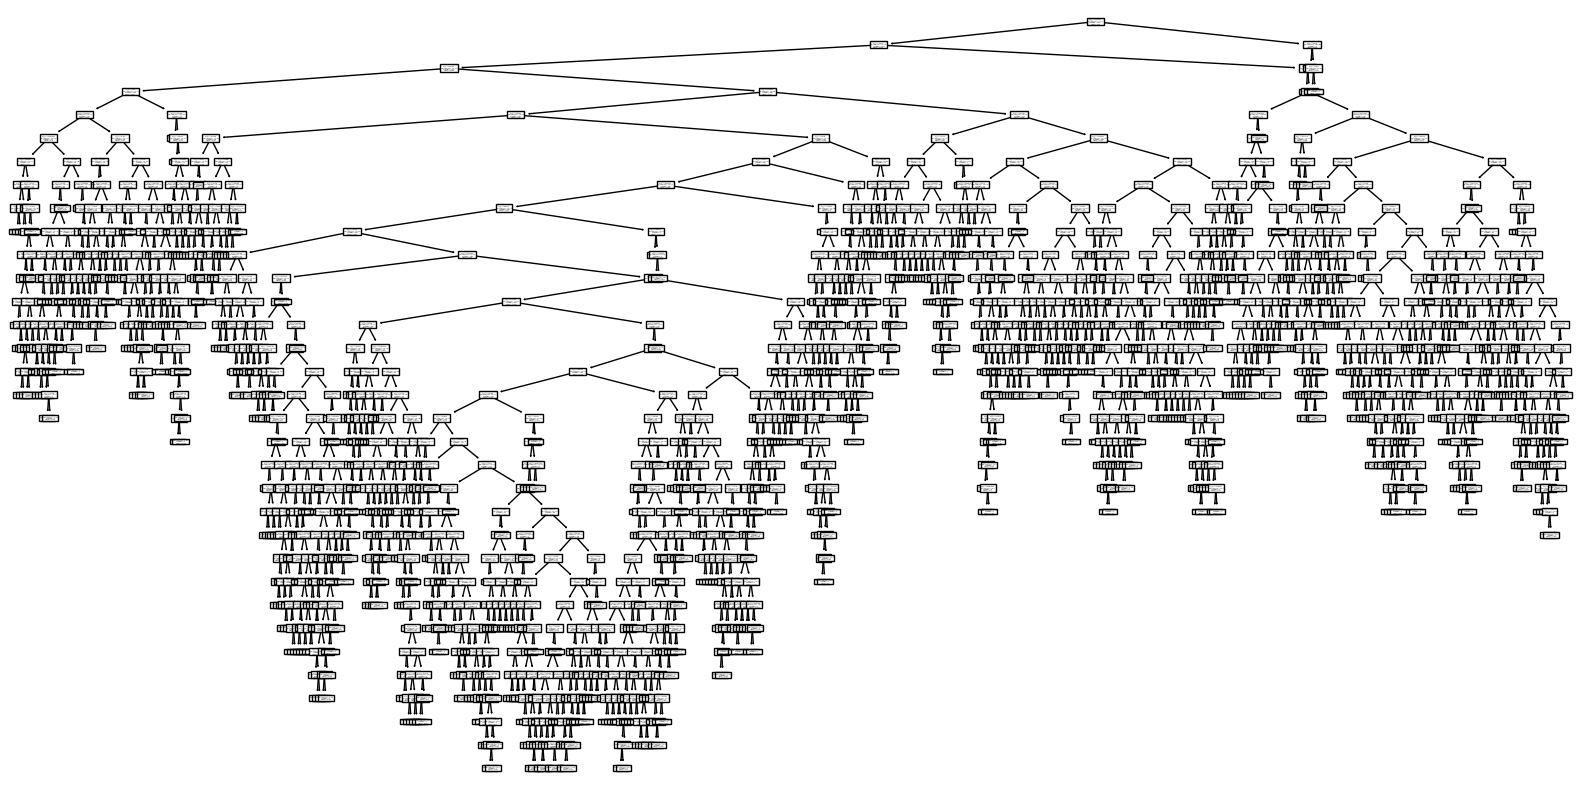

In [87]:
# 트리 시각화

import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,10))
# plot_tree(tree)
# plt.show()

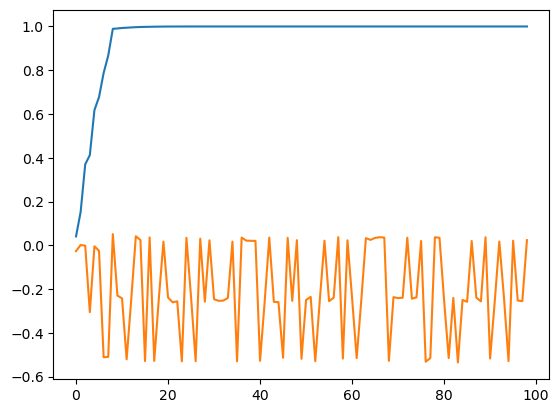

In [105]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
x_=[]
y_=[]
for i in range(1,100):
    tree=DecisionTreeRegressor(max_depth=i).fit(x_train, y_train)
    x_.append(tree.score(x_train, y_train))
    y_.append(tree.score(x_test, y_test))
    # print("훈  련 세트 점수:", tree.score(x_train, y_train))
    # print("테스트 세트 점수:", tree.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)

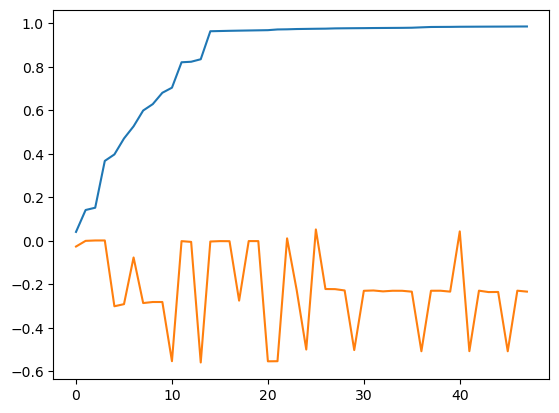

In [178]:
x_=[]
y_=[]
for i in range(2,50):
    tree=DecisionTreeRegressor(max_leaf_nodes=i).fit(x_train, y_train)
    x_.append(tree.score(x_train, y_train))
    y_.append(tree.score(x_test, y_test))
    # print("훈  련 세트 점수:", tree.score(x_train, y_train))
    # print("테스트 세트 점수:", tree.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)

In [104]:
# ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor

tree=ExtraTreeRegressor().fit(x_train, y_train)

print("훈  련 세트 점수:", tree.score(x_train, y_train))
print("테스트 세트 점수:", tree.score(x_test, y_test))

훈  련 세트 점수: 1.0
테스트 세트 점수: -0.5863641213120927


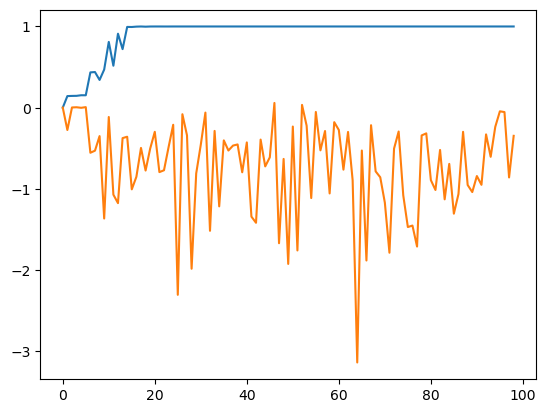

In [106]:
# ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor
x_=[]
y_=[]
for i in range(1,100):
    tree=ExtraTreeRegressor(max_depth=i).fit(x_train, y_train)
    x_.append(tree.score(x_train, y_train))
    y_.append(tree.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

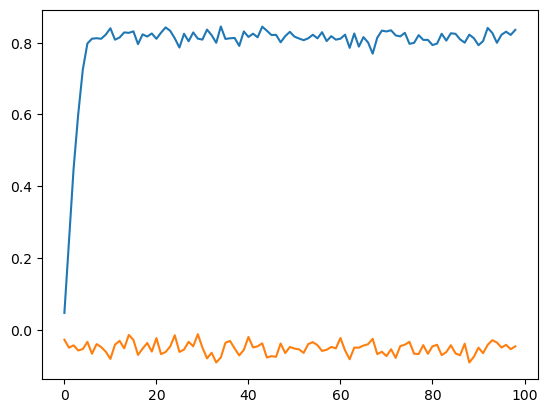

In [108]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
x_=[]
y_=[]
for i in range(1,100):
    tree=RandomForestRegressor(max_depth=i).fit(x_train, y_train)
    x_.append(tree.score(x_train, y_train))
    y_.append(tree.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

In [113]:
# XG
import xgboost as xgb

x_=[]
y_=[]
md=xgb.XGBRegressor().fit(x_train, y_train)
md.score(x_test, y_test)

-0.25918868341024326

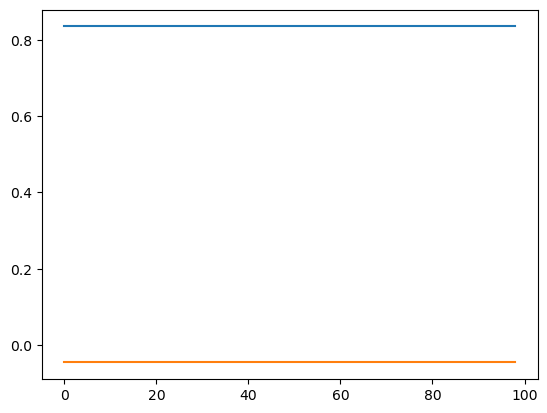

In [128]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
x_=[]
y_=[]
for i in np.arange(0.01,1,0.01):
    gbr=GradientBoostingRegressor(n_estimators=1, learning_rate=i).fit(x_train, y_train)
    x_.append(tree.score(x_train, y_train))
    y_.append(tree.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

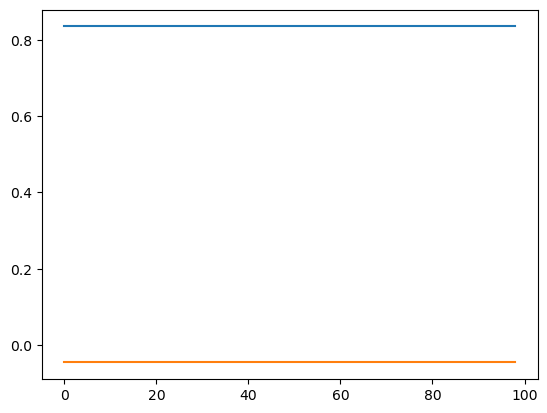

In [129]:
x_=[]
y_=[]
for i in range(1,100):
    gbr=GradientBoostingRegressor(n_estimators=i).fit(x_train, y_train)
    x_.append(tree.score(x_train, y_train))
    y_.append(tree.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

In [132]:
# HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
hgb=HistGradientBoostingRegressor().fit(x_train, y_train)
print("훈  련 세트 점수:", hgb.score(x_train, y_train))
print("테스트 세트 점수:", hgb.score(x_test, y_test))

훈  련 세트 점수: 0.6969217798988689
테스트 세트 점수: -0.03519223821575368


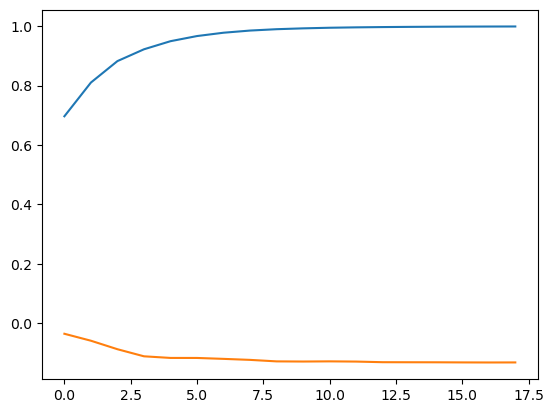

In [133]:
x_=[]
y_=[]
for i in range(100, 1000, 50):
    gbr=HistGradientBoostingRegressor(max_iter=i).fit(x_train, y_train)
    x_.append(gbr.score(x_train, y_train))
    y_.append(gbr.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

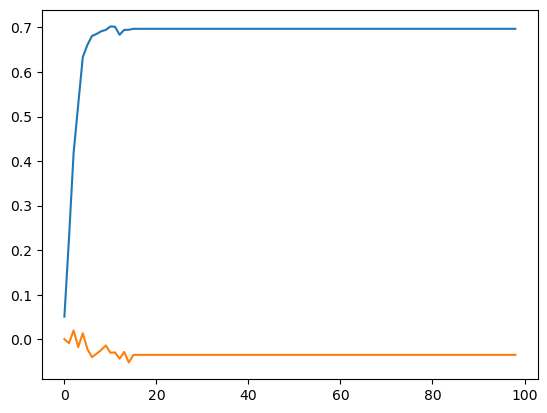

In [134]:
x_=[]
y_=[]
for i in range(1, 100):
    gbr=HistGradientBoostingRegressor(max_depth=i).fit(x_train, y_train)
    x_.append(gbr.score(x_train, y_train))
    y_.append(gbr.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

In [137]:
tree.predict(x_test)

array([ 1.9357760e-01,  1.2168170e-01,  3.1591190e-01,  4.1903000e-03,
        2.5450250e-01,  5.6078800e-02,  6.1815900e-02,  8.3583000e-03,
        2.2232330e-01, -2.8817700e-02,  8.0061800e-02,  3.1357820e-01,
        1.0340540e-01,  2.5020760e-01,  2.1655000e-03,  3.9674900e-01,
       -7.7872500e-02,  3.0247950e-01,  5.2590900e-02,  1.4425500e-02,
        1.9748710e-01,  2.0467000e-03,  2.7155930e-01,  1.7453400e-01,
        2.4438000e-03,  1.7405950e-01,  3.0631100e-02,  1.5769200e-01,
        5.5386800e-02,  2.1231570e-01,  1.1286590e-01,  3.2256000e-03,
        2.9550630e-01, -3.2559700e-02, -4.1081000e-03,  4.6491500e-02,
        8.7243800e-02,  1.3046500e-02,  1.4416700e-02,  1.3669062e+00,
        9.4361200e-02,  1.4712100e-01,  1.4970560e-01, -1.4556300e-02,
        4.6267400e-02, -8.1101800e-02,  5.7308300e-02,  1.2328090e-01,
        4.1262800e-02,  2.0388000e-03, -8.2023600e-02,  1.0216880e-01,
        8.0475810e-01,  1.3438760e-01,  3.9301100e-02, -3.3524000e-03,
      

In [139]:
from sklearn.metrics import mean_squared_error

RMSE = (mean_squared_error(y_test, tree.predict(x_test))**0.5)*100
RMSE

150.62259242998778

In [141]:
# 경고무시
import warnings
warnings.filterwarnings('ignore')

scores=[]

names=[]
s_n=[]
# models[:41]+models[43:]

for name, model in models[:41]+models[43:]:
    
    # error 발생시 pass
    try:
        
        # 모델 객체 생성
        md=model()
        print(md)
        # print(name)
        # 학습
        md.fit(x_train, y_train)
        # 평가
        score=md.score(x_train, y_train)
        score2=md.score(x_test, y_test)
        RMSE = (mean_squared_error(y_test, md.predict(x_test))**0.5)*100
        
        # 이름과 점수 리스트에 담기
        # names.append(name)
        # scores.append(score)
        # print(score)
        s_n.append((name, RMSE)) # 이름과 점수 한번에 담기
        
    except:
        pass

ARDRegression()
AdaBoostRegressor()
BaggingRegressor()
BayesianRidge()
CCA()
DecisionTreeRegressor()
DummyRegressor()
ElasticNet()
ElasticNetCV()
ExtraTreeRegressor()
ExtraTreesRegressor()
GammaRegressor()
GaussianProcessRegressor()
GradientBoostingRegressor()
HistGradientBoostingRegressor()
HuberRegressor()
IsotonicRegression()
KNeighborsRegressor()
KernelRidge()
Lars()
LarsCV()
Lasso()
LassoCV()
LassoLars()
LassoLarsCV()
LassoLarsIC()
LinearRegression()
LinearSVR()
MLPRegressor()
MultiTaskElasticNet()
MultiTaskElasticNetCV()
MultiTaskLasso()
MultiTaskLassoCV()
NuSVR()
OrthogonalMatchingPursuit()
OrthogonalMatchingPursuitCV()
PLSCanonical()
PLSRegression()
PassiveAggressiveRegressor()
PoissonRegressor()
RadiusNeighborsRegressor()
RandomForestRegressor()
Ridge()
RidgeCV()
SGDRegressor()
SVR()
TheilSenRegressor()
TransformedTargetRegressor()
TweedieRegressor()


In [145]:
s_n.sort(key= lambda x: x[1])
s_n

[('LassoLarsIC', 147.25672409143064),
 ('ARDRegression', 147.26103319251354),
 ('LarsCV', 147.26504745023738),
 ('LassoLarsCV', 147.26504745023738),
 ('ElasticNetCV', 147.2704552860688),
 ('LassoCV', 147.27045528608278),
 ('DummyRegressor', 147.270565217304),
 ('LassoLars', 147.270565217304),
 ('Lasso', 147.27057209903973),
 ('BayesianRidge', 147.27079242704008),
 ('ElasticNet', 147.27228349284388),
 ('OrthogonalMatchingPursuit', 147.28900989291415),
 ('OrthogonalMatchingPursuitCV', 147.28900989291415),
 ('KernelRidge', 147.37421104969147),
 ('TweedieRegressor', 147.3797393732565),
 ('Ridge', 147.41728469643616),
 ('RidgeCV', 147.41730289243068),
 ('Lars', 147.4173037109227),
 ('LinearRegression', 147.4173037109227),
 ('TransformedTargetRegressor', 147.4173037109227),
 ('PLSRegression', 147.41751117218047),
 ('NuSVR', 147.54374954977908),
 ('SVR', 147.5704077388967),
 ('HuberRegressor', 147.5979958244323),
 ('TheilSenRegressor', 147.93622839416906),
 ('GaussianProcessRegressor', 148.54

In [146]:
# LassoLarsIC
# ARDRegression
# LarsCV
# LassoLarsCV 
# ElasticNetCV
# LassoCV
# DummyRegressor
# LassoLars
# Lasso


In [158]:
# Lasso
from sklearn.linear_model import Lasso

md = Lasso(alpha=0.001).fit(x_train, y_train)

RMSE = (mean_squared_error(y_train, md.predict(x_train))**0.5)*100
RMSE2 = (mean_squared_error(y_test, md.predict(x_test))**0.5)*100

print("훈  련 세트 점수:", RMSE)
print("테스트 세트 점수:", RMSE2)

훈  련 세트 점수: 118.28134689879106
테스트 세트 점수: 147.41597220828743


In [174]:
# 그리드 서치 lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

md = Lasso(random_state=0)

best_score=0

param_gird={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search=GridSearchCV(md, param_grid=param_gird, scoring='accuracy',cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_,grid_search.best_score_)

{'alpha': 0.0001} nan


In [160]:
# ARDRegression

from sklearn.linear_model import ARDRegression

md = ARDRegression().fit(x_train, y_train)

RMSE = (mean_squared_error(y_train, md.predict(x_train))**0.5)*100
RMSE2 = (mean_squared_error(y_test, md.predict(x_test))**0.5)*100

print("훈  련 세트 점수:", RMSE)
print("테스트 세트 점수:", RMSE2)

훈  련 세트 점수: 118.33547991544602
테스트 세트 점수: 147.26103319251354


In [165]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(random_state=0)

best_score=0

param_gird={'max_depth': [None, 1, 2, 3, 4, 5],
            'max_leaf_nodes':[3, 5, 7, 9]}

grid_search=GridSearchCV(tree, param_grid=param_gird, scoring='accuracy',cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             scoring='accuracy')

In [171]:
df=pd.DataFrame(grid_search.cv_results_)
grid_search.best_score_
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 3}

In [172]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(max_depth=None, max_leaf_nodes=3).fit(x_train, y_train)

print("훈  련 세트 점수:", tree.score(x_train, y_train))
print("테스트 세트 점수:", tree.score(x_test, y_test))

훈  련 세트 점수: 0.14124187189693116
테스트 세트 점수: -0.0006251259874372472
